In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data preprocessing

In [112]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

In [142]:
#Data uploading
kc_house_data = pd.read_csv('kc_house_data.csv')

#information about columns
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [114]:
#Let's check out the missing values

kc_house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#Let's check out data types

kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Floors and bathrooms are type float. Let's change that

In [143]:
kc_house_data['floors'] = kc_house_data['floors'].astype('int64')
kc_house_data['bathrooms'] = kc_house_data['bathrooms'].astype('int64')
kc_house_data['bathrooms'] = np.round(kc_house_data['bathrooms'])
kc_house_data['floors'] = np.round(kc_house_data['floors'])

In [144]:
# I'll be interested by the year that the prices has been given

kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])
kc_house_data['Year'] = kc_house_data['date'].apply(lambda date: date.year)

### Features selection

To better select the features, we'll be interested to the correlations between features and the
target, the variance of features and the correlation between each feature.
If two features have a high correlation, one could be drop
If one feature is less correlated to the target, it could be drop
Drop features with less variance

<AxesSubplot:>

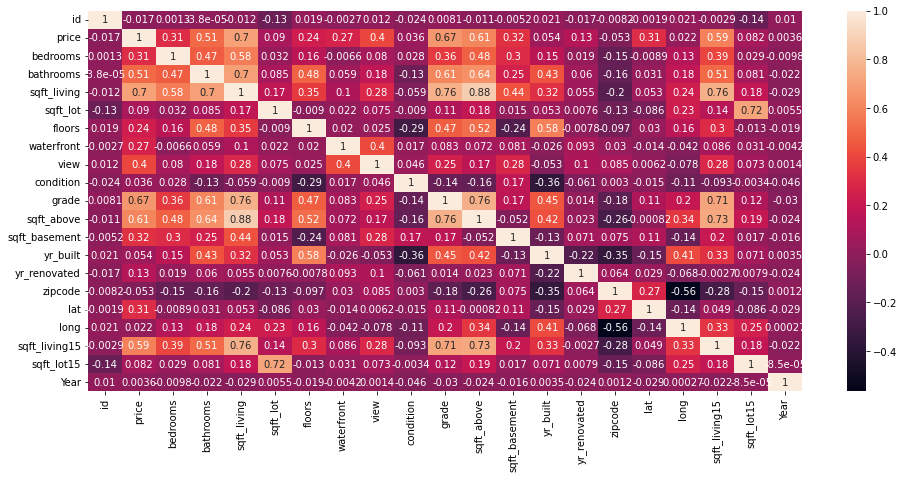

In [145]:
resizeplot(16,7)
sns.heatmap(kc_house_data.corr(),annot=True)

According to the heatmap, we consider as less important all the features with a coefficient of 
correlation to the price less than 0,2. That features will be automatically deleted.
The features with a high correlation between each another will be droped and only one of them
will stay in the dataset.

id, sqft_lot, condition, yr_built, yr_renovated, zipcode, long, sqft_lot15, Year are less correlated
to the target.
sqft_living, bathrooms, grade, sqft_above, sqft_living15 are high correlated considering couples 
among them. 
We're going to keep only sqft_living in order to avoid redundancy.
We also have to remove the date because i modified its structure above.

In [146]:
kc_house_data = kc_house_data.drop(['id', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated',
                                    'zipcode', 'long', 'sqft_lot15', 'Year', 'bathrooms','grade',
                                    'sqft_above', 'sqft_living15', 'date'], axis = 1)

In [147]:
kc_house_data.head(10)

,price,bedrooms,sqft_living,floors,waterfront,view,sqft_basement,lat
0,221900.0,3,1180,1,0,0,0,47.5112
1,538000.0,3,2570,2,0,0,400,47.7210
2,180000.0,2,770,1,0,0,0,47.7379
3,604000.0,4,1960,1,0,0,910,47.5208
4,510000.0,3,1680,1,0,0,0,47.6168
5,1225000.0,4,5420,1,0,0,1530,47.6561
6,257500.0,3,1715,2,0,0,0,47.3097
7,291850.0,3,1060,1,0,0,0,47.4095
8,229500.0,3,1780,1,0,0,730,47.5123
9,323000.0,3,1890,2,0,0,0,47.3684


<AxesSubplot:>

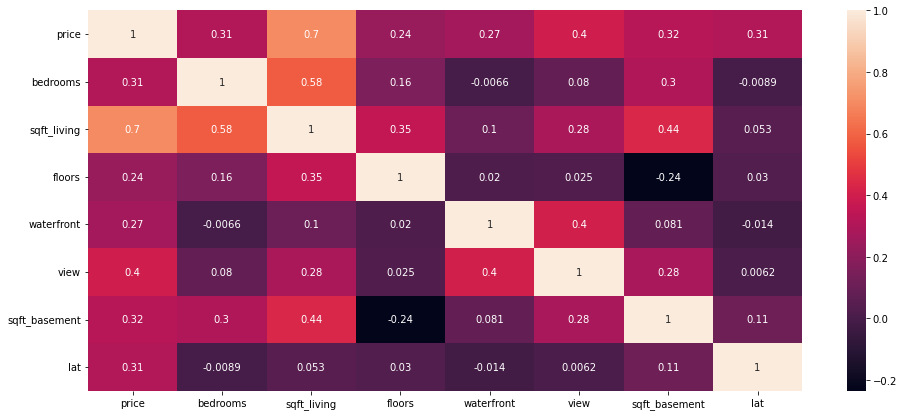

In [148]:
resizeplot(16,7)
sns.heatmap(kc_house_data.corr(),annot=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

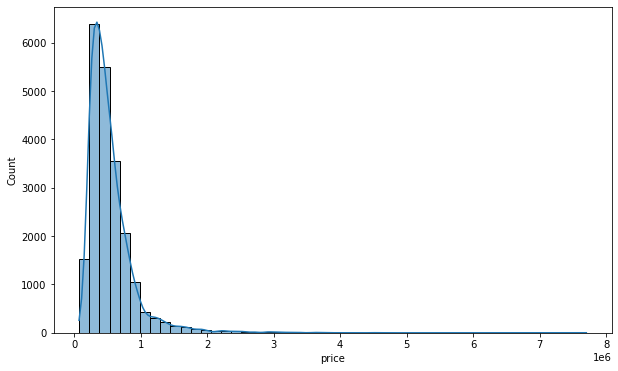

In [149]:
resizeplot(10,6)
sns.histplot(kc_house_data['price'],kde=True,bins=50)

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

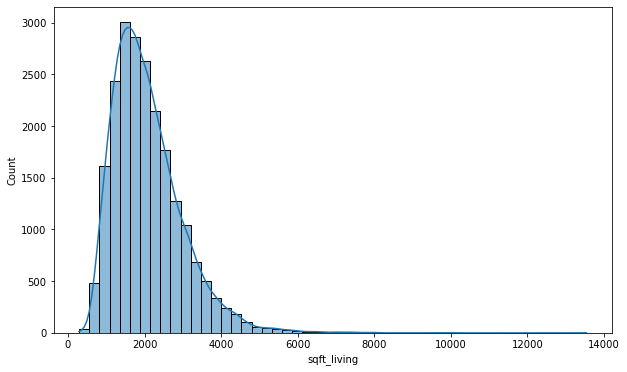

In [154]:
resizeplot(10,6)
sns.histplot(kc_house_data['sqft_living'],kde=True,bins=50)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

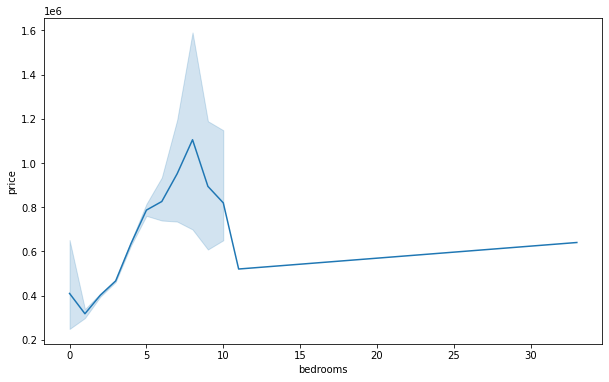

In [67]:
resizeplot(10,6)
sns.lineplot(x = 'bedrooms', y = 'price', data = kc_house_data)

#This plot shows us that from more than 10 bedrooms, there is a linear relationship
#between the number of bedrooms in a house and the price of that house.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

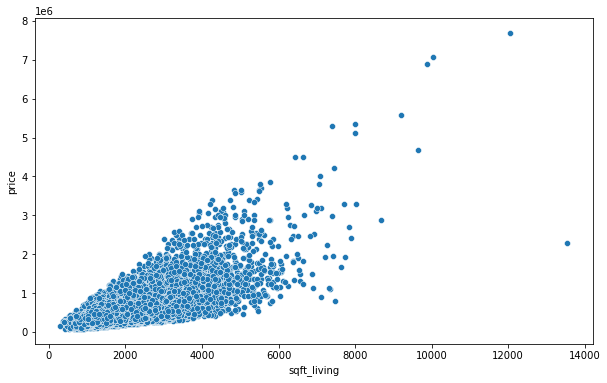

In [155]:
resizeplot(10,6)
sns.scatterplot(x = 'sqft_living', y = 'price', data = kc_house_data)

# We notice the presence of some outliers

<AxesSubplot:xlabel='floors', ylabel='price'>

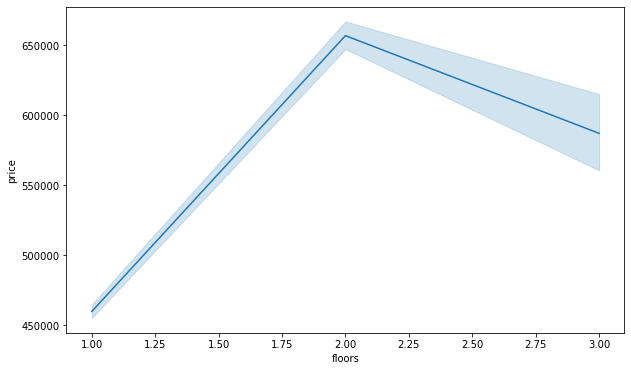

In [69]:
resizeplot(10,6)
sns.lineplot(x = 'floors', y = 'price', data = kc_house_data)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

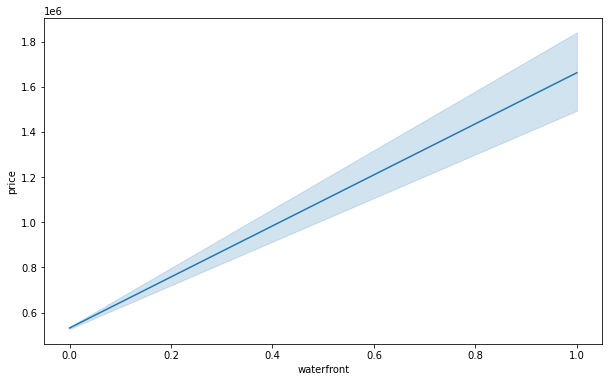

In [70]:
resizeplot(10,6)
sns.lineplot(x = 'waterfront', y = 'price', data = kc_house_data)

#This plot shows us that the number of waterfront is straightly related to the price of houses.

<AxesSubplot:xlabel='view', ylabel='price'>

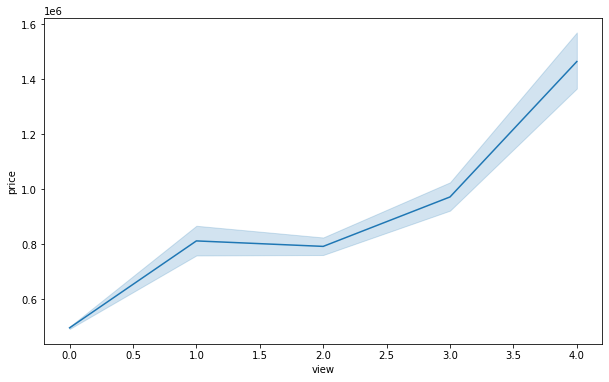

In [71]:
resizeplot(10,6)
sns.lineplot(x = 'view', y = 'price', data = kc_house_data)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

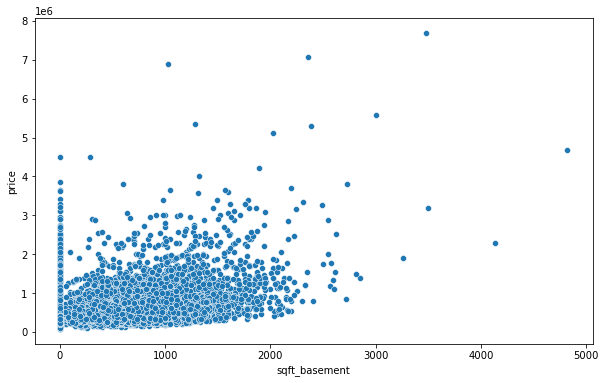

In [72]:
resizeplot(10,6)
sns.scatterplot(x = 'sqft_basement', y = 'price', data = kc_house_data)

# We notice the presence of some outliers.

<AxesSubplot:xlabel='lat', ylabel='price'>

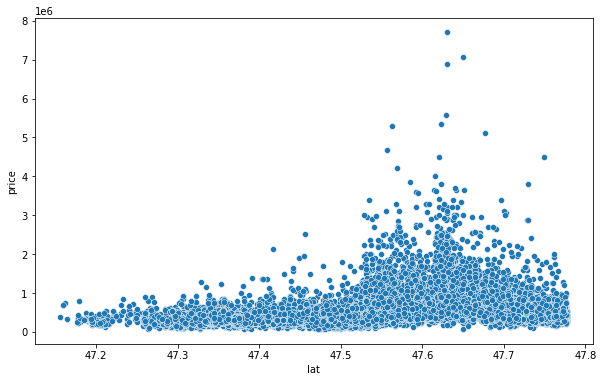

In [73]:
resizeplot(10,6)
sns.scatterplot(x = 'lat', y = 'price', data = kc_house_data)

# We notice the presence of some outliers linked to the latitude

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

### Linear regression

In [159]:
# Let's split our dataset into a training set and a test set

target = kc_house_data['price'].values[:, np.newaxis]
feature = kc_house_data['sqft_living'].values[:, np.newaxis]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size =0.20, 
                                                    random_state = 30)

In [161]:
# Let's apply linear regression to the training set

model = LinearRegression()
model.fit(feature_train, target_train)
predicted = model.predict(feature_test)

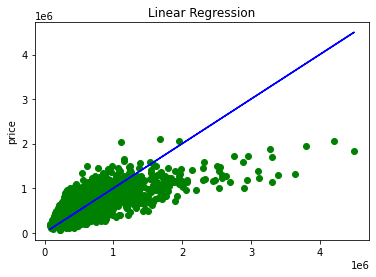

In [162]:
# Linear regression plot

plt.scatter(target_test, predicted, color = 'g')
plt.title('Linear Regression')
plt.ylabel('price')
plt.plot(target_test, target_test, color = 'b')
plt.show()

In [163]:
model.score(feature_test,target_test)

0.4879814110728805

In [165]:
print("MSE", mean_squared_error(target_test,predicted))
print("R squared", metrics.r2_score(target_test,predicted))

MSE 64179676631.68388
R squared 0.4879814110728805


### Multilinear regression

In [166]:
# Let's split our dataset into a training set and a test set

target = kc_house_data['price'].values[:, np.newaxis]
features = kc_house_data.drop(['price'], axis = 1).values

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size =0.20, 
                                                    random_state = 30)

In [167]:
# Let's apply Multilinear regression to the training set

model = LinearRegression()
model.fit(features_train, target_train)
predicted = model.predict(features_test)

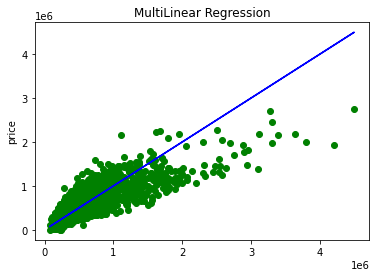

In [168]:
# MultiLinear regression plot

plt.scatter(target_test, predicted, color = 'g')
plt.title('MultiLinear Regression')
plt.ylabel('price')
plt.plot(target_test, target_test, color = 'b')
plt.show()

In [169]:
model.score(features_test,target_test)

0.6572897312022365

In [170]:
print("MSE", mean_squared_error(target_test,predicted))
print("R squared", metrics.r2_score(target_test,predicted))

MSE 42957491593.97938
R squared 0.6572897312022365


Multilinear regression score is better than linear one. In addition, the MSE is minimised. The pourcentage of data fitting indicated in this multilinear regression is higher than the one in linear regression.

### Polynomial regression

In [173]:
target = kc_house_data['price'].values[:, np.newaxis]
features = kc_house_data.drop(['price'], axis = 1).values

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size =0.20, 
                                                    random_state = 30)

In [175]:
# Let's apply Polynomial regression to the training set

model = LinearRegression()
poly = PolynomialFeatures(degree = 3)
features_train_fit = poly.fit_transform(features_train) #transforming our input data
model.fit(features_train_fit, target_train)
features_test_ = poly.fit_transform(features_test)
predicted = model.predict(features_test_)# Let's apply Polynomial regression to the training set

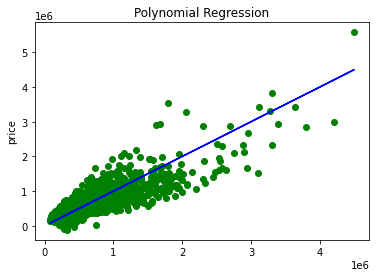

In [176]:
# Polynomial regression plot

plt.scatter(target_test, predicted, color = 'g')
plt.title('Polynomial Regression')
plt.ylabel('price')
plt.plot(target_test, target_test, color = 'b')
plt.show()

In [178]:
model.score(features_test_,target_test)

0.7220398914363666

In [179]:
print("MSE: ", metrics.mean_squared_error(target_test, predicted))
print("R squared: ", metrics.r2_score(target_test,predicted))

MSE:  34841293402.066284
R squared:  0.7220398914363666


Polynomial regression score is better than multilinear one. In addition, the MSE is minimised. The pourcentage of data fitting indicated in this polynomial regression is higher than the one in multilinear regression.